<font color='red'>No se aceptan soluciones que usen metodologías distintas a la vistas en clases.</font>

<font color='orange'>Se puede usar el código de los ejemplos vistos en clases.</font>



# 1) Cambiar el nombre del archivo

<font color='red'>WARNING-2: CAMBIA EL NOMBRE DEL ARCHIVO ipynb INCLUYENDO TU RUT</font>

Ejemplo, si tu RUT es 12.345.678-9, el nombre de este archivo debe cambiarse de "E07_Tu_Rut.ipynb" a "E07_12345678-9.ipynb"


# 2) Importe las Librerías

(1 Punto)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías de los ejemplos vistos en clase.*



In [ ]:
# CODIGO AQUI

import numpy as np
import matplotlib.pylab as plt
from cv2 import imread, filter2D, IMREAD_GRAYSCALE, CV_64F
import cv2

# 3) Restauración movimiento vertical

(5 Puntos)

Para la imagen indicada

* diseñar un proceso de degradación (llamado `degvertical`) de movimiento vertical uniforme de `n` pixeles. En este proceso el input es la imagen original, el output es la imagen degradada.

* diseñar un proceso de restauración (llamado `miniovertical`) de la imagen usando el método MINIO. En este proceso el input es la imagen degradada, el output es la imagen restaurada.

* diseñar la función de error ERR de la siguiente manera: calcule la matriz E = | F - F' | / Q / 255 x 100, donde F es imagen original, F' imagen restaurada, Q es el número de pixeles de la imagen y |x| es el valor absoluto de x. Se define ERR como el promedio de todos los elementos de E.

* probar ambos procesos con `n=15` y con `n=25`(entregue el error en ambos casos).

Imagen disponible en: `https://www.dropbox.com/s/i62imnk7j0ot430/puerta_bw.png`





In [ ]:
!wget https://www.dropbox.com/s/i62imnk7j0ot430/puerta_bw.png

--2024-11-06 17:24:10--  https://www.dropbox.com/s/i62imnk7j0ot430/puerta_bw.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/3j13x1k8tl87wzt9eambb/puerta_bw.png?rlkey=ebadesslczeszeixklsxeaxko [following]
--2024-11-06 17:24:10--  https://www.dropbox.com/scl/fi/3j13x1k8tl87wzt9eambb/puerta_bw.png?rlkey=ebadesslczeszeixklsxeaxko
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc749877cbcc51417f2224b0024f.dl.dropboxusercontent.com/cd/0/inline/Cd5RWntxp-3tUUa5SNXBbu5glWFgPUsiEmdl3vy6ZoCs2AilH837Y4W_M3kVxzNUx1ZZhO87L0oN_AnYQnt2x9y4m-ODLzZmFT7dgUvsXKJdnXjzdAwGM2tfc-smWXEYha8/file# [following]
--2024-11-06 17:24:11--  https://uc749877cbcc51417f2224b0024f.dl.dropboxusercontent.com/cd/0/inline/Cd5RWntxp-3tUUa5SNX

size of img: (522, 574)


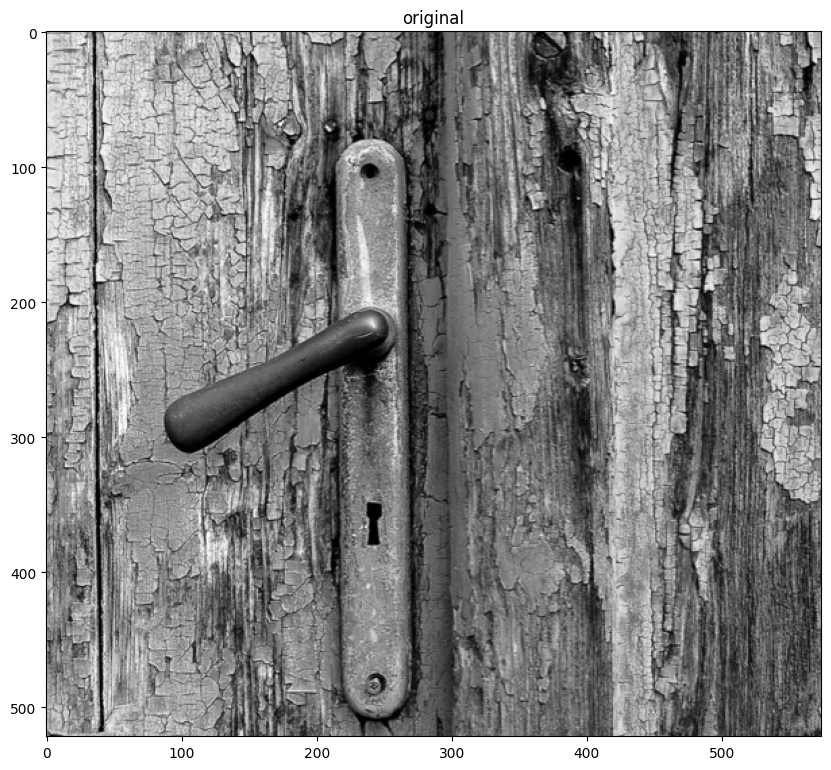

In [ ]:
img = imread('puerta_bw.png', IMREAD_GRAYSCALE)

print('size of img:',img.shape)
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.title('original')
plt.show()

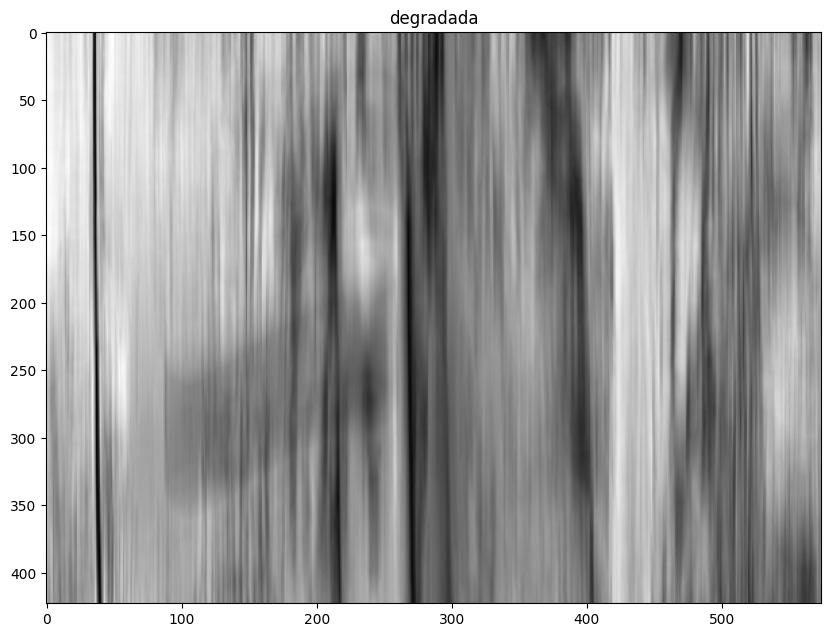

In [ ]:
def degvertical(img, n, h):
  N = img.shape[0]
  M = N - n + 1

  # Imagen degradada con un blur vertical
  img_g = filter2D(img.astype('double'), CV_64F, h)
  img_g = img_g[0:M, :]  # Recortar la imagen degradada

  return img_g

n = 100
h = np.ones((n, 1)) / n  # Filtro vertical para blur vertical
img_g = degvertical(img, n, h)

plt.figure(figsize=(10,10))
plt.imshow(img_g,cmap='gray')
plt.title('degradada')
plt.show()

522
423
(522, 423)
(423, 574)
(522, 574)
(522, 423)
(522, 574)


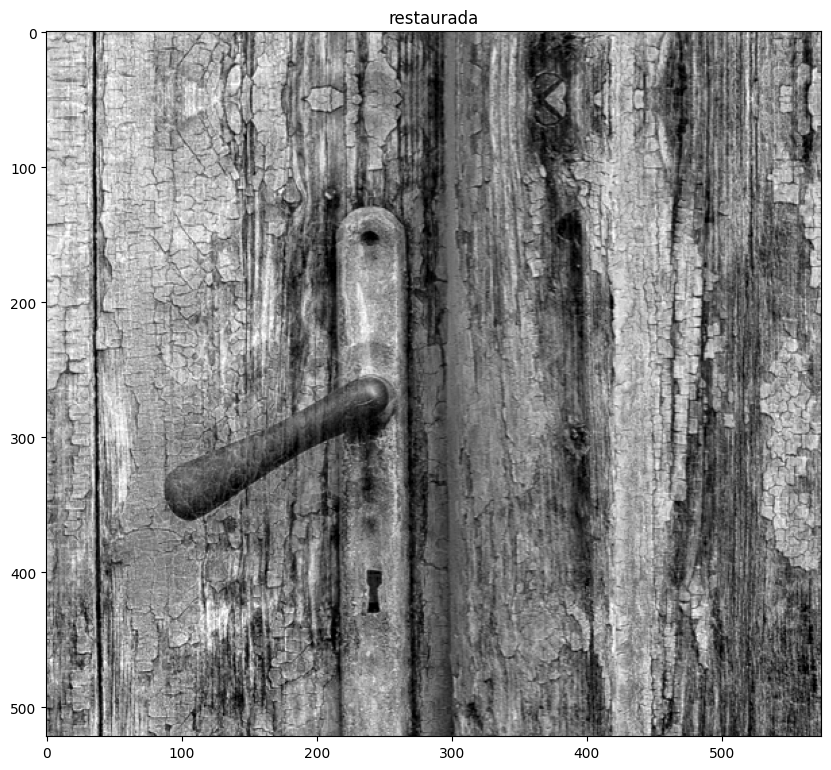

In [ ]:
# diseñar un proceso de restauración (llamado miniovertical) de la imagen usando el método MINIO.
# En este proceso el input es la imagen degradada, el output es la imagen restaurada.

def miniovertical(_img_g, h):
    """
    Args:
        _img_g: Blurred image as ndarray.
        h: PSF as ndarray.
        method: Method for minimization.
    Returns:
        _img_f: The restored image as ndarray.
    Raises:
        ValueError: if h is not ndarray.
        Exception
    Authors:
        Christian Pieringer & Domingo Mery
        from pyxvis library.
    """

    # Check input parameters
    if not isinstance(_img_g, np.ndarray):
        raise Exception('{} is not valid input format for the blurred image _img_g.'.format(type(_img_g)))
    if not isinstance(h, np.ndarray):
        raise Exception('{} is not a valid format for PSF.'.format(type(h)))

    # Main
    nh = h.shape[0]      # Longitud del filtro PSF en términos de filas (vertical)
    n = _img_g.shape[0]   # Número de filas de la imagen degradada
    m = n + nh - 1        # Tamaño extendido para convolución vertical
    _mat_h = np.zeros((m, n))  # Matriz para convolución vertical
    print(m)
    print(n)

    for i in range(n):
        if i + nh <= m:   # Nos aseguramos de no salir del límite
            _mat_h[i:i + nh, i] = h.ravel()

    _lambda = 1e6  # Multiplicador de Lagrange

    # Restauración según el método
    _mat_p = np.hstack([np.eye(n, dtype='float'), np.zeros((n, nh-1))])
    _mat_p = _mat_p.T
    print(_mat_p.shape)
    _img_f = (_lambda * _mat_h + _mat_p) @ _img_g  # Multiplicación vertical
    print(_img_g.shape)
    print(_img_f.shape)
    print(_mat_h.shape)
    _img_f = ((_img_f.T @ np.linalg.inv((_lambda * _mat_h) @ _mat_h.T + _mat_p @ _mat_p.T))).T
    print(_img_f.shape)

    # Clipping entre 0 y 255
    _img_f[_img_f < 0] = 0
    _img_f[_img_f > 255] = 255

    return _img_f



# Restauración de la imagen
fs = miniovertical(img_g, h)
plt.figure(figsize=(10,10))
plt.imshow(fs,cmap='gray')
plt.title('restaurada')
plt.show()


In [ ]:
def calculate_err(F, F_restored):
    Q = F.size     # Número total de píxeles en la imagen

    # Matriz de error
    E = np.abs(F - F_restored) / Q / 255 * 100

    # Cálculo de ERR como el promedio de todos los elementos de E
    ERR = np.mean(E)

    return ERR

error1 = calculate_err(img, fs)
print(error1)

5.2627278828192844e-05


607
508
(607, 508)
(508, 574)
(607, 574)
(607, 508)
(607, 574)


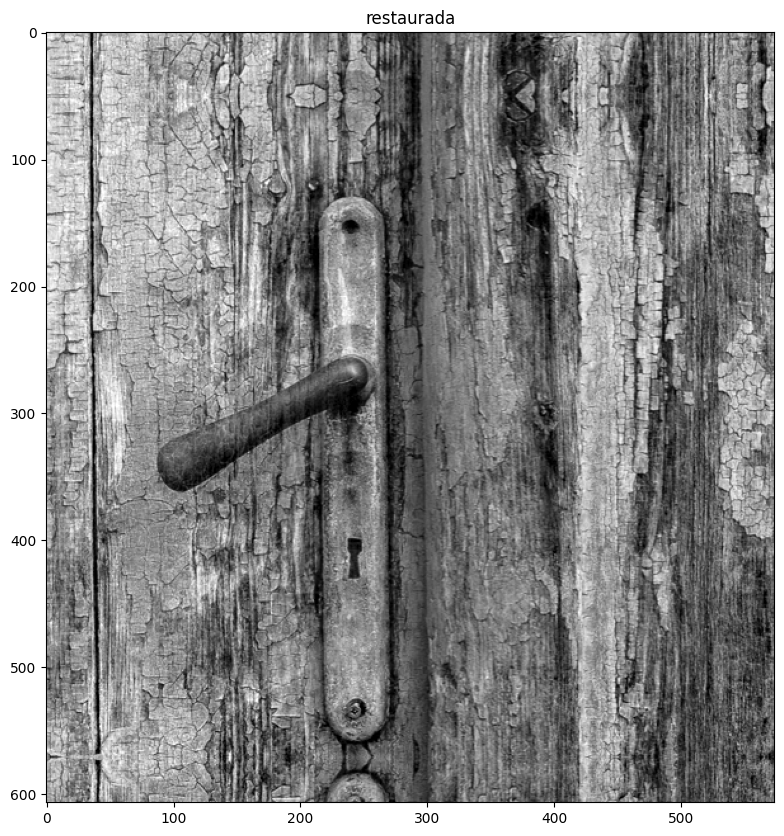

In [ ]:
n2 = 15
img_g2 = degvertical(img, n2, h)

fs2 = miniovertical(img_g2, h)

plt.figure(figsize=(10,10))
plt.imshow(fs2,cmap='gray')
plt.title('restaurada')
plt.show()

#probar ambos procesos con n=15 y con n=25 (entregue el error en ambos casos).

In [ ]:
n3 = 25
img_g3 = degvertical(img, n3, h)

fs3 = miniovertical(img_g3, h)

plt.figure(figsize=(10,10))
plt.imshow(fs3,cmap='gray')
plt.title('restaurada')
plt.show()


597
498
(597, 498)
(498, 574)
(597, 574)
(597, 498)


# 4) Resuaración de imagen con degradación 2D
(12 Puntos)

Para la imagen indicada de 32x32 pixeles (un detalle de la luna):

* diseñar un proceso de degradación (llamado `deg3x3`) de filtro promedio de 3x3 pixeles. En este proceso el input es la imagen original, el output es la imagen degradada después de haber sido filtrada por la máscara promedio de 3x3 (todos sus elementos son 1/9).

* diseñar un proceso de restauración (llamado `rest3x3`) de la imagen usando el método de restauración visto en clases con operador de Lagrange y matriz de regularización W = I. En este proceso el input es la imagen degradada, el output es la imagen restaurada.

* usar la misma función de error ERR del ejercicio anterior.


Imagen disponible en: `https://www.dropbox.com/scl/fi/sqrvhxohjieeegqxkmmms/moonspot.png?rlkey=qt0qz19m3w3x5h9s089iag5em`




In [ ]:
!wget https://www.dropbox.com/scl/fi/sqrvhxohjieeegqxkmmms/moonspot.png?rlkey=qt0qz19m3w3x5h9s089iag5em

--2024-11-06 21:02:01--  https://www.dropbox.com/scl/fi/sqrvhxohjieeegqxkmmms/moonspot.png?rlkey=qt0qz19m3w3x5h9s089iag5em
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9da49f61b1b03d7491761dad95.dl.dropboxusercontent.com/cd/0/inline/Cd6GZSifNeGGy1J9Di9qz6bQbSCGv96YBJUMazP-xgn-IgyoGmVc1aj3rOGEsecu5k4KJWLfvq95vuiqfsifiBvAWvRF6rAQsQELb-0GSM5HvpPQIGR8fD7SNwgxGY9VAMA/file# [following]
--2024-11-06 21:02:01--  https://uc9da49f61b1b03d7491761dad95.dl.dropboxusercontent.com/cd/0/inline/Cd6GZSifNeGGy1J9Di9qz6bQbSCGv96YBJUMazP-xgn-IgyoGmVc1aj3rOGEsecu5k4KJWLfvq95vuiqfsifiBvAWvRF6rAQsQELb-0GSM5HvpPQIGR8fD7SNwgxGY9VAMA/file
Resolving uc9da49f61b1b03d7491761dad95.dl.dropboxusercontent.com (uc9da49f61b1b03d7491761dad95.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f
Connecting to uc9da49

size of img: (32, 32)


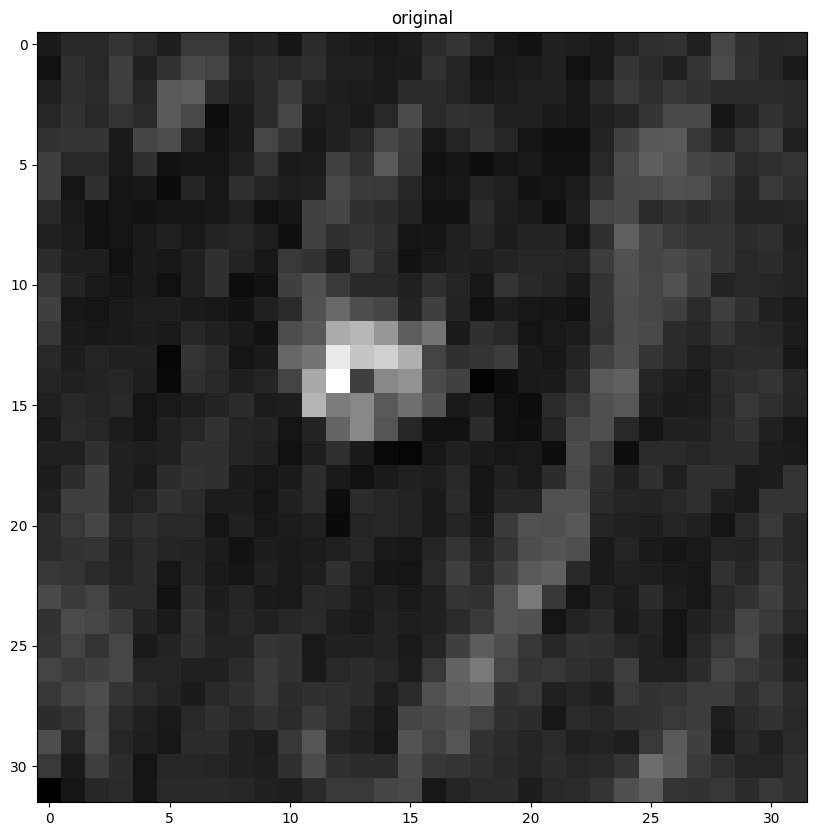

In [ ]:
img2 = imread('moonspot.png?rlkey=qt0qz19m3w3x5h9s089iag5em', IMREAD_GRAYSCALE)

print('size of img:',img2.shape)
plt.figure(figsize=(10,10))
plt.imshow(img2,cmap='gray')
plt.title('original')
plt.show()

size of img: (24, 24)


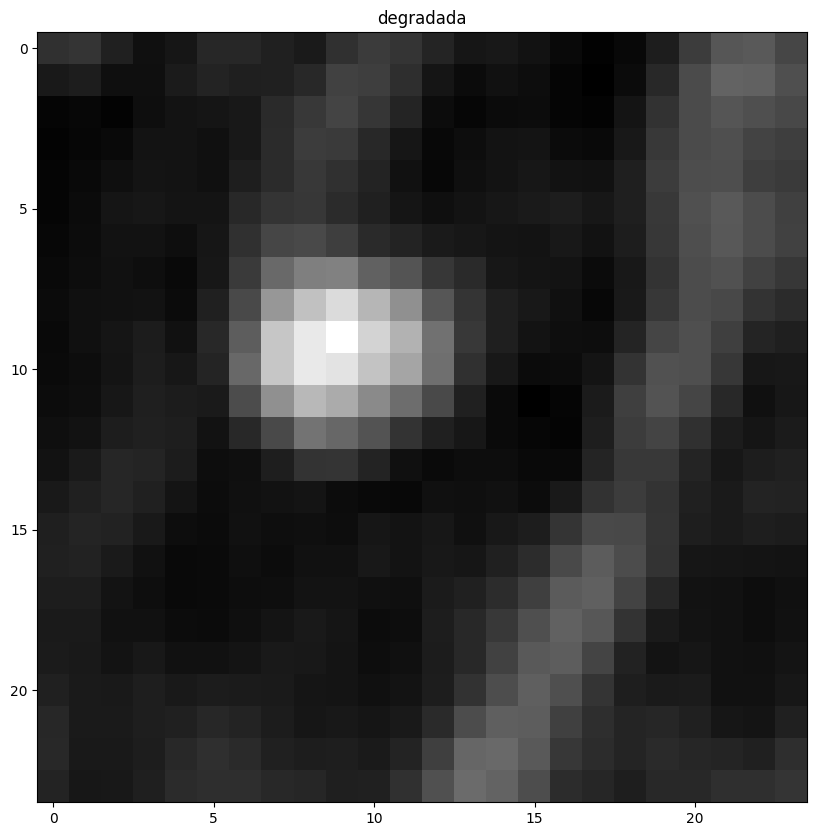

In [ ]:
def filtro_3x3(img):
      kernel = np.ones((3, 3)) / 9
      blurred_img = cv2.filter2D(img, cv2.CV_64F, kernel)
      return blurred_img

k = 9
m = int(k/2)
G = filtro_3x3(img2)
G = G[m:-m,m:-m]
print('size of img:',G.shape)
plt.figure(figsize=(10,10))
plt.imshow(G,cmap='gray')
plt.title('degradada')
plt.show()


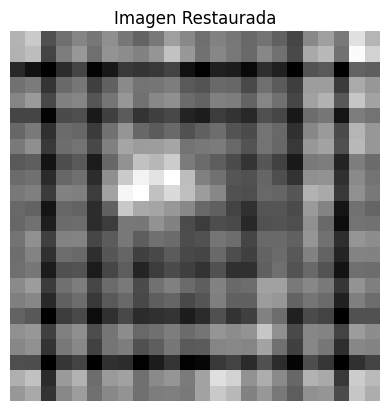

In [ ]:
# diseñar un proceso de restauración (llamado rest3x3)
# de la imagen usando el método de restauración visto en clases con operador de Lagrange y matriz de regularización W = I.
# En este proceso el input es la imagen degradada, el output es la imagen restaurada.

def rest3x3(img):
    kernel = np.ones((3, 3)) / 9
    nh, nw = kernel.shape
    lambda_val=1e-2
    img_h, img_w = img.shape

    H = np.zeros((img_h * img_w, img_h * img_w))
    for i in range(img_h):
        for j in range(img_w):
            for m in range(-1, 2):
                for n in range(-1, 2):
                    if 0 <= i + m < img_h and 0 <= j + n < img_w:
                        H[i * img_w + j, (i + m) * img_w + (j + n)] = kernel[m + 1, n + 1]

    W = np.eye(img_h * img_w)

    HtH = H.T @ H
    Htg = H.T @ img.flatten()

    restored_flat = np.linalg.inv(HtH + lambda_val * W) @ Htg # probablemente sea similar a lo hecho en el inciso 1
    restored_img = restored_flat.reshape(img_h, img_w)

    restored_img[restored_img < 0] = 0
    restored_img[restored_img > 255] = 255
    restored_img = restored_img.astype(np.uint8)

    return restored_img

# Restaurar la imagen
restored_img = rest3x3(G)

plt.imshow(restored_img, cmap='gray')
plt.title("Imagen Restaurada")
plt.axis('off')

plt.show()


In [ ]:
# import numpy as np

# def construir_matriz_H(kernel, m):
#     """
#     Construye la matriz H de tamaño m*m x m*m para aplicar el kernel sobre la imagen m x m.
#     Cada fila de H representa la aplicación del kernel en un píxel específico de la imagen.
#     """
#     nh, mh = kernel.shape  # Dimensiones del kernel
#     k_center_x, k_center_y = nh // 2, mh // 2  # Centro del kernel
#     H = np.zeros((m * m, m * m))  # Matriz de convolución H

#     # Iterar sobre cada píxel de la imagen
#     for i in range(m):
#         for j in range(m):
#             # Fila correspondiente a la posición (i, j) en H
#             row = i * m + j

#             # Colocar los valores del kernel en H desplazados según (i, j)
#             for ki in range(nh):
#                 for kj in range(mh):
#                     img_x = i + ki - k_center_x
#                     img_y = j + kj - k_center_y

#                     # Verificar que los índices estén dentro de los límites de la imagen
#                     if 0 <= img_x < m and 0 <= img_y < m:
#                         col = img_x * m + img_y
#                         H[row, col] = kernel[ki, kj]

#     return H

# Ejemplo de uso
n = 32  # Tamaño de la imagen nxn
kernel = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # Kernel de desenfoque simple
H = construir_matriz_H(kernel, m, n)
print(H[:10, :35])
print(H.shape)


IndexError: index 1024 is out of bounds for axis 1 with size 1024

(32, 32)
(1024,)


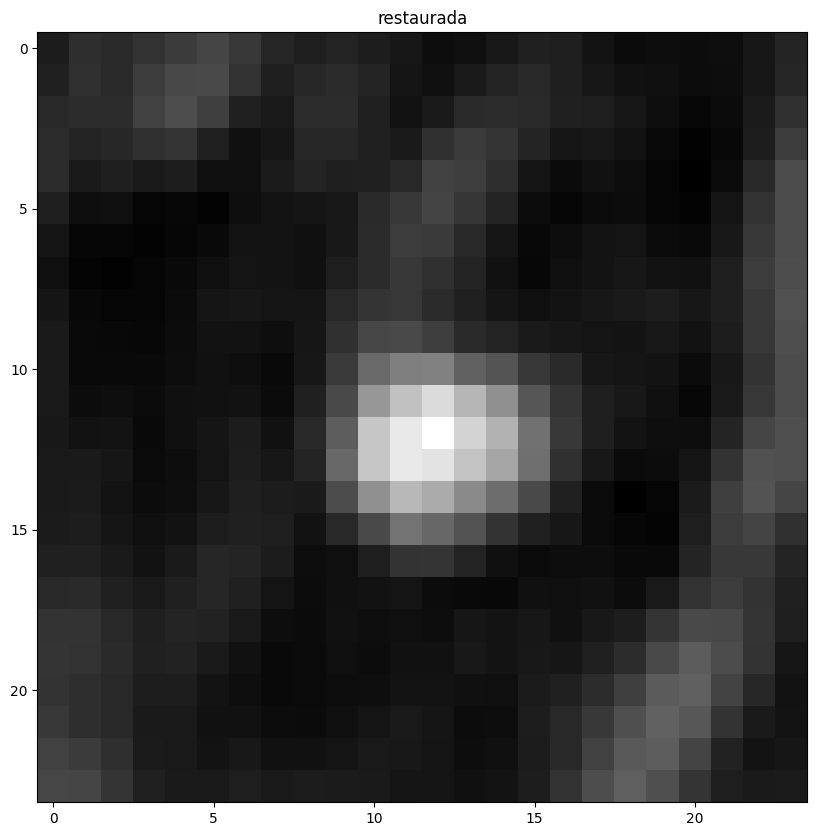

In [ ]:
print(img2.shape)
array = img2.flatten()
print(array.shape)
Fb = H @ array.T
Fb = Fb.reshape(24, 24)

plt.figure(figsize=(10,10))
plt.imshow(Fb, cmap='gray')
plt.title('restaurada')
plt.show()

In [ ]:

# def construir_matriz_H(kernel, m):
#     """
#     Construye la matriz H de modo que cada fila tenga el kernel desplazado progresivamente
#     de acuerdo con el tamaño de la imagen m x m.
#     """
#     nh, mh = kernel.shape  # Dimensiones del kernel
#     H = np.zeros((m * m, m * m))  # Crear matriz H de tamaño adecuado
#     h_flat = kernel.flatten()  # Aplanar el kernel para facilitar la asignación

#     # Iteramos sobre cada fila y columna para añadir el kernel desplazado
#     for row in range(m * m):
#         # Calcular el índice de inicio para colocar el kernel en esta fila
#         row_start = (row // m) * m + (row % m)

#         # Colocar los valores del kernel en la posición correcta
#         for i in range(nh):
#             for j in range(mh):
#                 # Calcular la posición en H para cada valor del kernel
#                 pos = row_start + i * m + j
#                 if pos < m * m:
#                     H[row, pos] = kernel[i, j]

#     return H

# kernel = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# fragment_size = 10         # Tamaño de F
# H = construir_matriz_H(kernel, fragment_size)
# print(H[:10, :35])
# print(H.shape)

def restaura(frag, H):
    """
    Aplica la restauración a un fragmento utilizando la matriz de degradación H.
    """
    N, M = frag.shape
    frag = frag.flatten(order='C')  # Aplanado por filas
    m = frag.shape[0]
    _lambda = 1e6  # Multiplicador de Lagrange para regularización

    # Regularización y restauración
    H_T = H.T
    A = H_T @ H + _lambda * np.eye(m)  # Matriz regularizada
    inv_A = np.linalg.inv(A)
    _img_f = inv_A @ H_T @ frag

    # Limitar los valores de la imagen entre 0 y 255
    _img_f[_img_f < 0] = 0
    _img_f[_img_f > 255] = 255

    # Reconstruir la imagen en el orden correcto
    restored_fragment = _img_f.reshape(N, M, order='C')

    return restored_fragment

# Ejemplo de restauración
G = np.random.rand(n, n) * 255  # Ejemplo de imagen degradada
Fb = restaura(G, H)
plt.figure(figsize=(10,10))
plt.imshow(Fb, cmap='gray')
plt.title('restaurada')
plt.show()


In [78]:
def construir_matriz_H(kernel, m, n):
    """
    Construye una matriz H de tamaño (n*n) x (m*m) para aplicar el kernel sobre una imagen de tamaño m x m.
    """
    nh, mh = kernel.shape  # Dimensiones del kernel
    H = np.zeros((n * n, m * m))  # Matriz de convolución H

    for i in range(n):
        for j in range(n):
            # Índice de la fila en H para la posición (i, j) de la salida
            row = i * n + j

            # Columna inicial de la matriz de entrada para esta posición de salida
            col_start = i * m + j

            # Inserta el kernel en la posición adecuada
            for ki in range(nh):
                for kj in range(mh):
                    idx = col_start + ki * m + kj
                    if 0 <= idx < m * m:
                        H[row, idx] = kernel[ki, kj]

    return H


# Parámetros de prueba
m = 32  # Dimensión de la imagen de entrada (m x m)
n = 24   # Dimensión de la imagen de salida (n x n)
kernel = kernel = np.ones((3, 3)) / 9  #np.array([[1, 2, 3], [4, 5, 6]])  # Kernel de ejemplo no cuadrado

# Construcción de la matriz H
H = construir_matriz_H(kernel, m, n)
print(H[:15, :30])  # Mostrando la salida deseada

print("Shape of H:", H.shape)


[[0.11111111 0.11111111 0.11111111 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.11111111 0.11111111 0.11111111 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.11111111 0.11111111 0.11111111
  0. 

(1024, 576)
(576,)


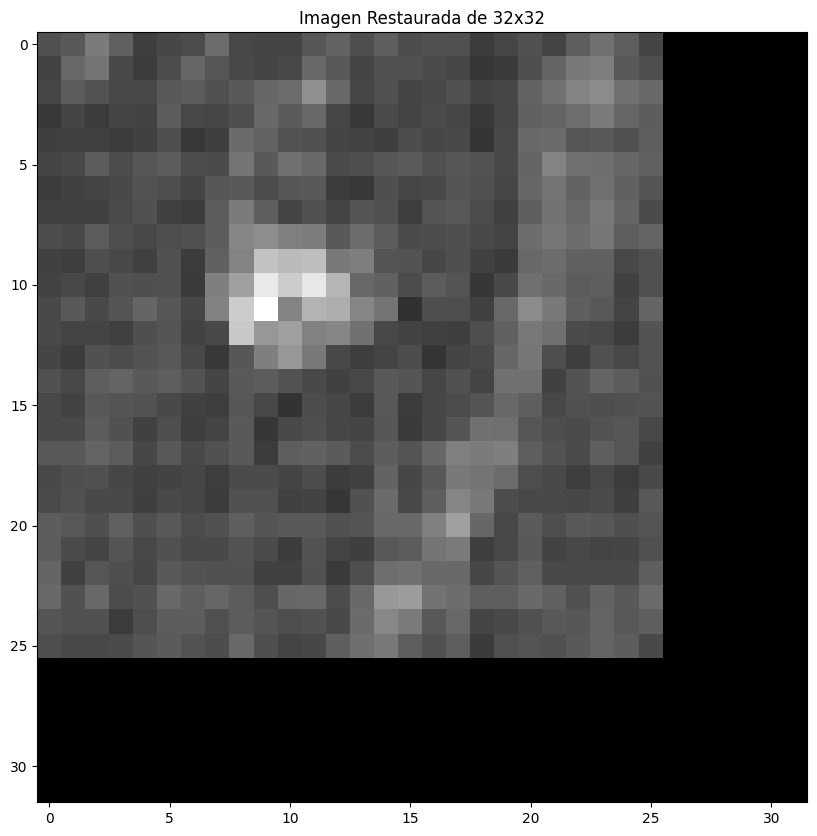

In [80]:
from scipy.ndimage import zoom

# Matriz identidad para regularización
W = np.eye(H.shape[1])

# Función para restaurar la imagen original de 32x32
def restaura_imagen(frag, H, m, W):
    """
    Restaura una imagen utilizando la matriz H y el tamaño de la imagen original.
    """
    _lambda = 1e6
    array = frag.flatten()

    # Calcular la matriz inversa ajustada con regularización
    A = _lambda * np.linalg.inv(_lambda * H.T @ H + W.T @ W) @ H.T
    print(A.shape)
    print(array.shape)
    Fb = array @ A.T  # La imagen restaurada debería tener tamaño 32x32 ahora
    Fb = Fb.reshape((m, m))  # Restauramos la imagen inicial en 32x32
    #Fb = Fb[:24,:24]
    #Fb_ampliada = zoom(Fb, (32/24, 32/24), order=3)

    plt.figure(figsize=(10, 10))
    plt.imshow(Fb, cmap='gray')
    plt.title('Imagen Restaurada de 32x32')
    plt.show()
    return Fb.astype(np.uint8)

m = 32
img_restaurada = restaura_imagen(G, H, m, W)





(1024,)
(576, 1024)


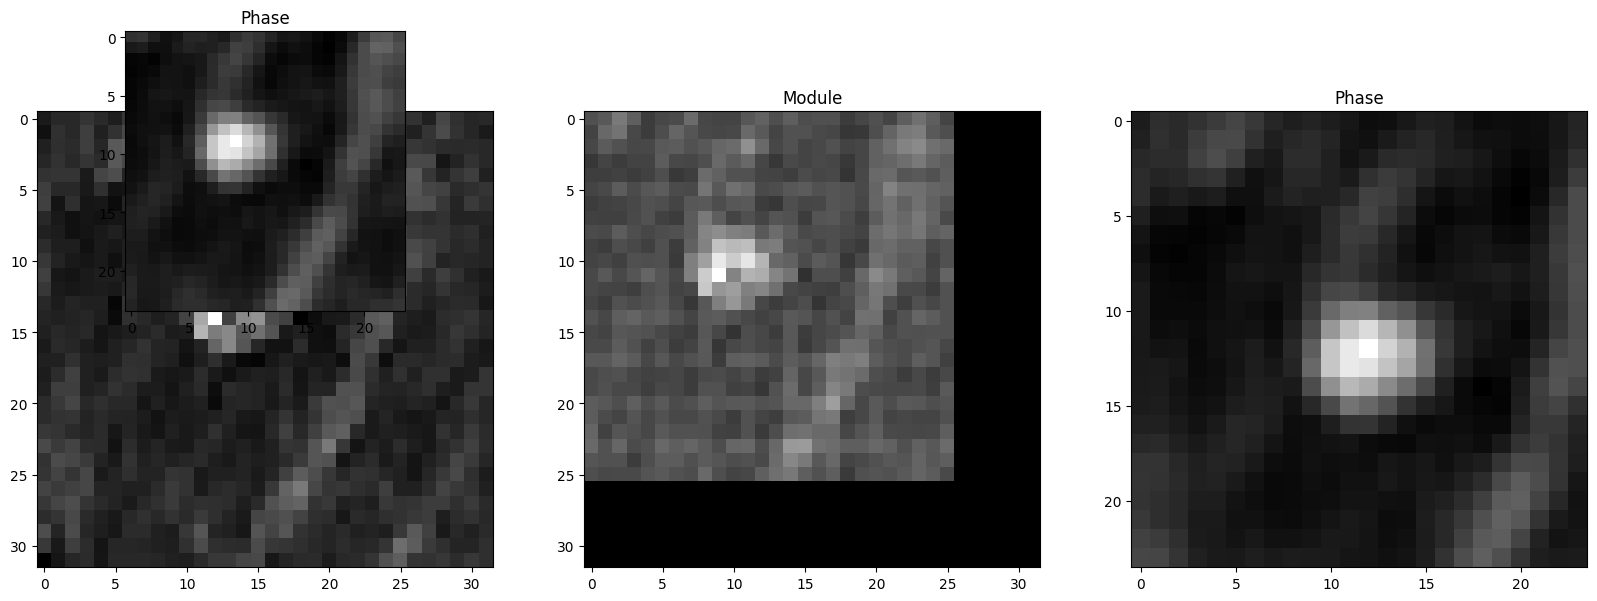

In [ ]:
img_ = img2.flatten()
print(img_.shape)
print(H.shape)
F = H @ img_.T

F = F.reshape(24, 24)

plt.figure(figsize=(20,8))

plt.subplot(131), plt.imshow(img2, "gray"), plt.title("Module")

plt.subplot(132), plt.imshow(img_restaurada, "gray"), plt.title("Module")

plt.subplot(133), plt.imshow(F, "gray"), plt.title("Phase")

plt.subplot(231), plt.imshow(G, "gray"), plt.title("Phase")
plt.show()

In [ ]:
def calculate_err(F, F_restored):
    Q = F.size     # Número total de píxeles en la imagen

    # Matriz de error
    E = np.abs(F - F_restored) / Q / 255 * 100

    # Cálculo de ERR como el promedio de todos los elementos de E
    ERR = np.mean(E)

    return ERR
error2 = calculate_err(img2, img_restaurada)
print(error2)

0.044688056497012865


# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL A CANVAS</font>

